In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"D:\2nd Project 360DigiTMG\datasets(2)\solar-power-dataset.csv")

In [3]:
df.head()

,DATE & TIME,UNIT1_INV1_Power,UNIT1_INV2_Power,UNIT2_INV1_Power,UNIT2_INV2_Power,GII,MODULE TEMP.1,RAIN,AMBIENT TEMPRETURE
0,01-04-2024 06:18,74.400002,73.099998,83.300003,85.199997,25,19.0,0.0,22.700001
1,01-04-2024 06:19,83.500000,81.599998,87.599998,90.099998,27,19.0,0.0,22.700001
2,01-04-2024 06:20,88.400002,86.500000,92.199997,95.000000,29,19.0,0.0,22.700001
3,01-04-2024 06:21,93.500000,91.400002,97.000000,100.099998,31,19.1,0.0,22.700001
4,01-04-2024 06:22,98.500000,96.400002,101.900002,105.000000,33,19.1,0.0,22.600000


In [4]:
df.shape

(68451, 9)

# Null value

In [6]:
df.isna().sum()

DATE & TIME           0
UNIT1_INV1_Power      0
UNIT1_INV2_Power      0
UNIT2_INV1_Power      0
UNIT2_INV2_Power      0
GII                   0
MODULE TEMP.1         0
RAIN                  0
AMBIENT TEMPRETURE    0
dtype: int64

# duplicate

In [8]:
df.duplicated().sum()

0

In [9]:
df.dtypes

DATE & TIME            object
UNIT1_INV1_Power      float64
UNIT1_INV2_Power      float64
UNIT2_INV1_Power      float64
UNIT2_INV2_Power      float64
GII                     int64
MODULE TEMP.1         float64
RAIN                  float64
AMBIENT TEMPRETURE    float64
dtype: object

# Typecasting

In [11]:
df["DATE & TIME"] = pd.to_datetime(df["DATE & TIME"], format="%d-%m-%Y %H:%M", dayfirst="True")
print(df["DATE & TIME"].dtype) 

datetime64[ns]


In [12]:
df.dtypes

DATE & TIME           datetime64[ns]
UNIT1_INV1_Power             float64
UNIT1_INV2_Power             float64
UNIT2_INV1_Power             float64
UNIT2_INV2_Power             float64
GII                            int64
MODULE TEMP.1                float64
RAIN                         float64
AMBIENT TEMPRETURE           float64
dtype: object

In [13]:
df

,DATE & TIME,UNIT1_INV1_Power,UNIT1_INV2_Power,UNIT2_INV1_Power,UNIT2_INV2_Power,GII,MODULE TEMP.1,RAIN,AMBIENT TEMPRETURE
0,2024-04-01 06:18:00,74.400002,73.099998,83.300003,85.199997,25,19.0,0.0,22.700001
1,2024-04-01 06:19:00,83.500000,81.599998,87.599998,90.099998,27,19.0,0.0,22.700001
2,2024-04-01 06:20:00,88.400002,86.500000,92.199997,95.000000,29,19.0,0.0,22.700001
3,2024-04-01 06:21:00,93.500000,91.400002,97.000000,100.099998,31,19.1,0.0,22.700001
4,2024-04-01 06:22:00,98.500000,96.400002,101.900002,105.000000,33,19.1,0.0,22.600000
...,...,...,...,...,...,...,...,...,...
68446,2024-06-30 18:06:00,0.000000,0.000000,21.000000,19.700001,3,23.6,0.0,25.500000
68447,2024-06-30 18:07:00,0.000000,0.000000,20.100000,18.700001,3,23.6,0.0,25.400000
68448,2024-06-30 18:08:00,0.000000,0.000000,18.900000,17.400000,3,23.5,0.0,25.400000
68449,2024-06-30 18:09:00,0.000000,0.000000,17.600000,16.000000,3,23.5,0.0,25.400000


# Outlier Treatment

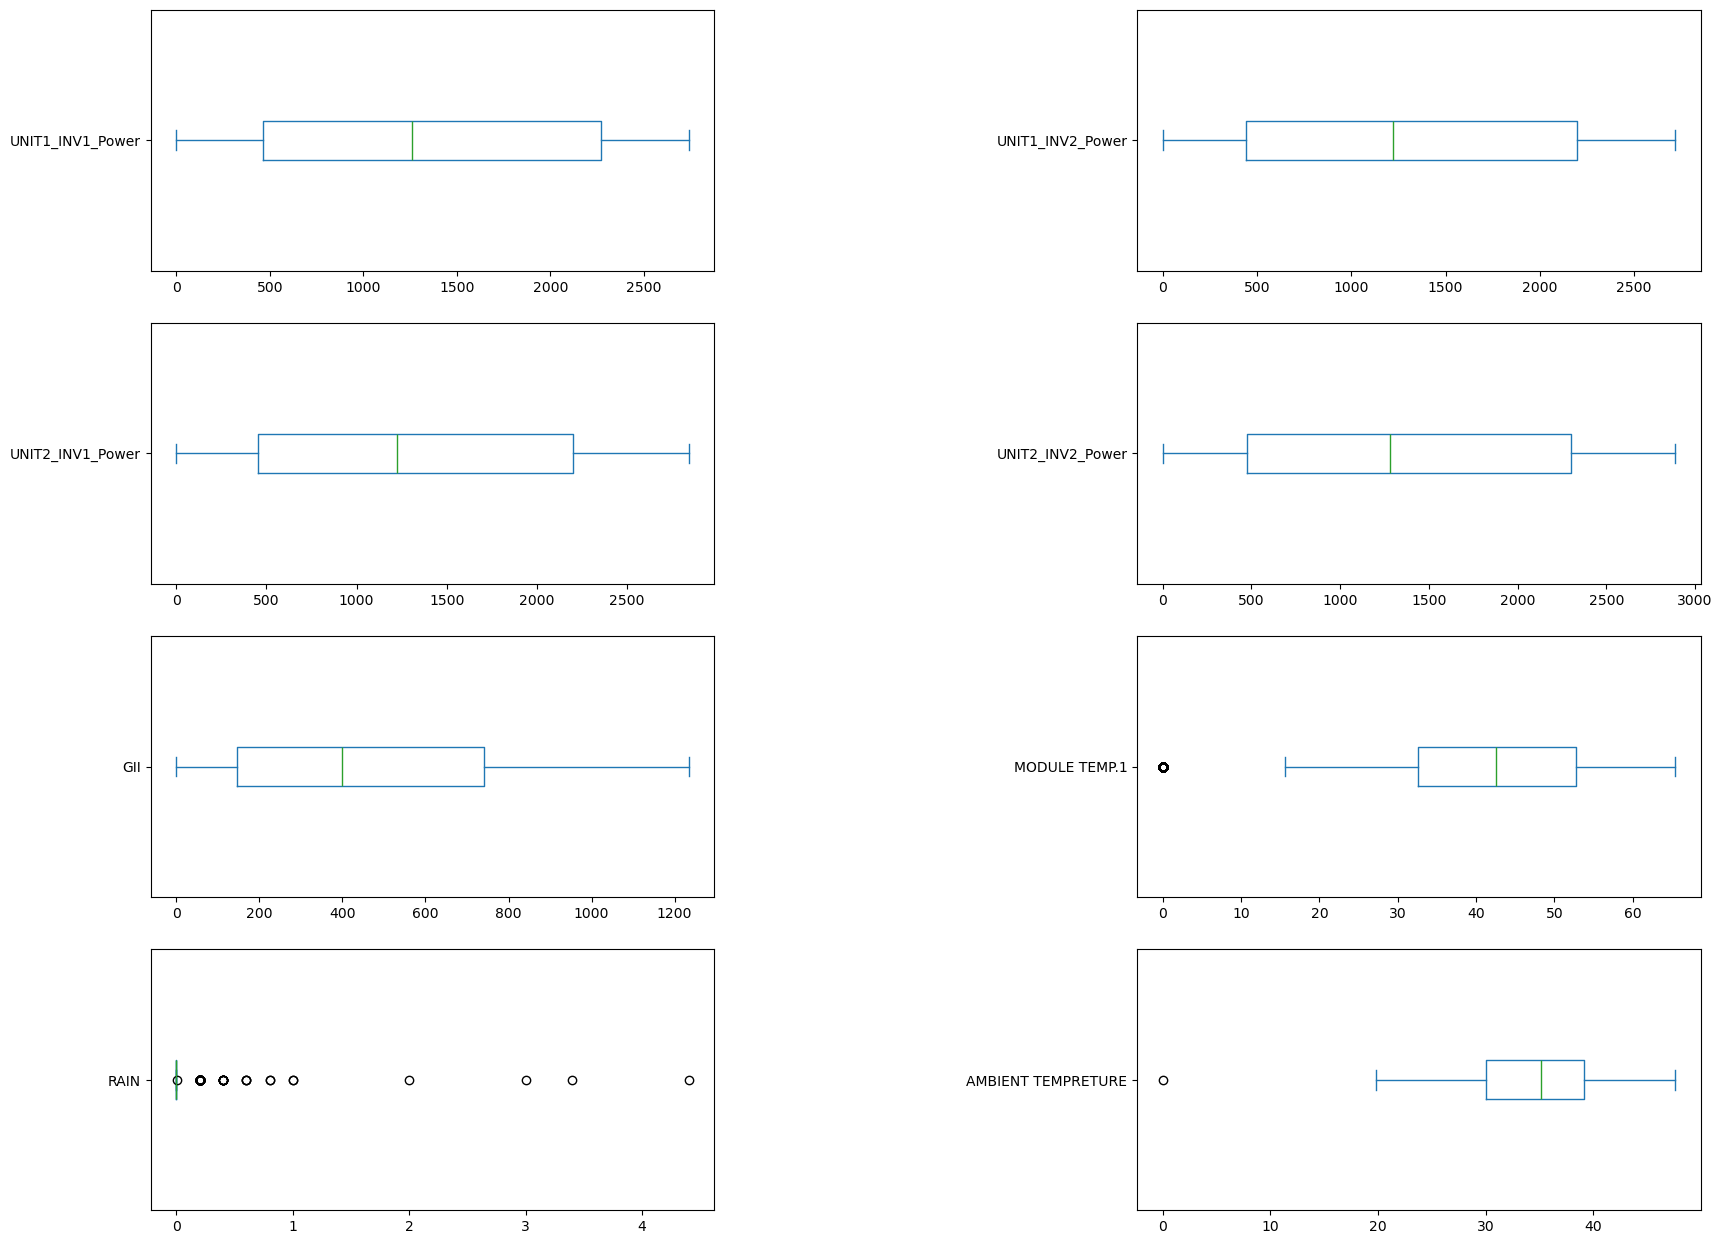

In [15]:
df.plot(kind="box", sharey=False, sharex=False, subplots=True, figsize=(20,40), layout=[10,2],vert=False)
plt.subplots_adjust(wspace=0.75)

In [16]:
from feature_engine.outliers import Winsorizer


In [17]:
win_df = Winsorizer(capping_method = 'iqr',
                   fold = 1.5,
                   tail = 'both',
                   variables = ['MODULE TEMP.1'])

In [18]:
df = win_df.fit_transform(df)

<Axes: ylabel='MODULE TEMP.1'>

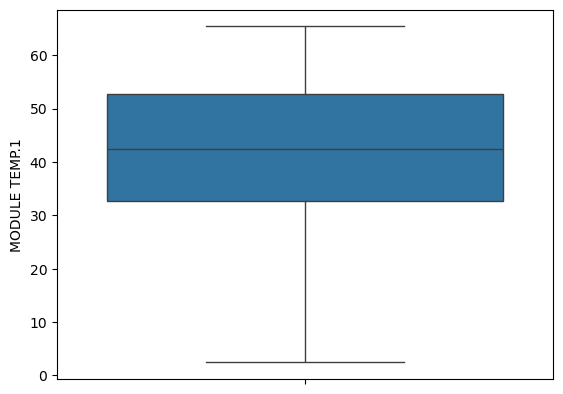

In [19]:
sns.boxplot(df['MODULE TEMP.1'])

In [20]:
from scipy import stats

df = df[(abs(stats.zscore(df["RAIN"])) < 3)]  # Keeps values within 3 standard deviations


<Axes: ylabel='RAIN'>

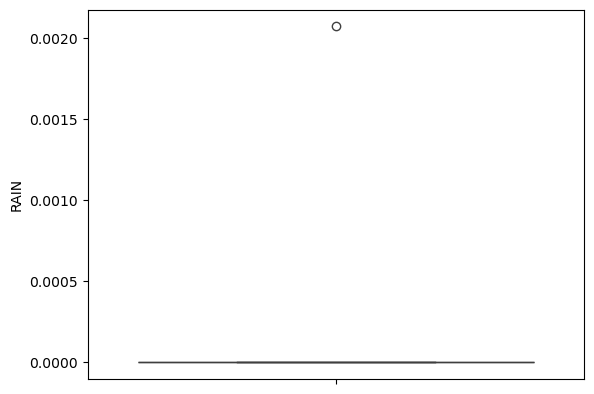

In [21]:
sns.boxplot(df['RAIN'])

In [22]:
Q1 = df["RAIN"].quantile(0.25)
Q3 = df["RAIN"].quantile(0.75)
IQR = Q3 - Q1

In [23]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [24]:
df = df[(df["RAIN"] >= lower_bound) & (df["RAIN"] <= upper_bound)]

<Axes: ylabel='RAIN'>

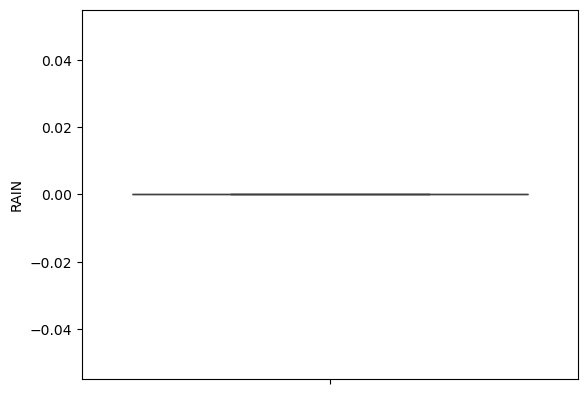

In [25]:
sns.boxplot(df['RAIN'])

In [26]:
win_df = Winsorizer(capping_method = 'iqr',
                   fold = 1.5,
                   tail = 'both',
                   variables = ['AMBIENT TEMPRETURE'])

In [27]:
df = win_df.fit_transform(df)

<Axes: ylabel='AMBIENT TEMPRETURE'>

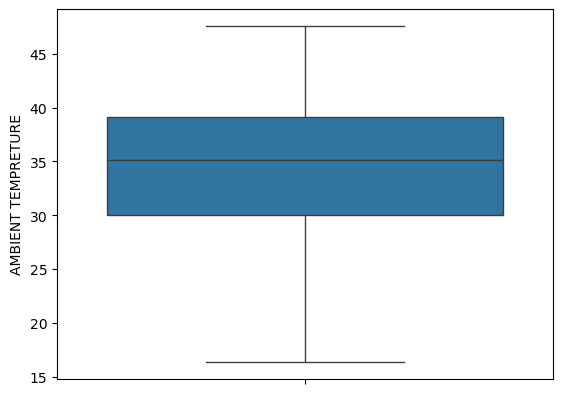

In [28]:
sns.boxplot(df['AMBIENT TEMPRETURE'])

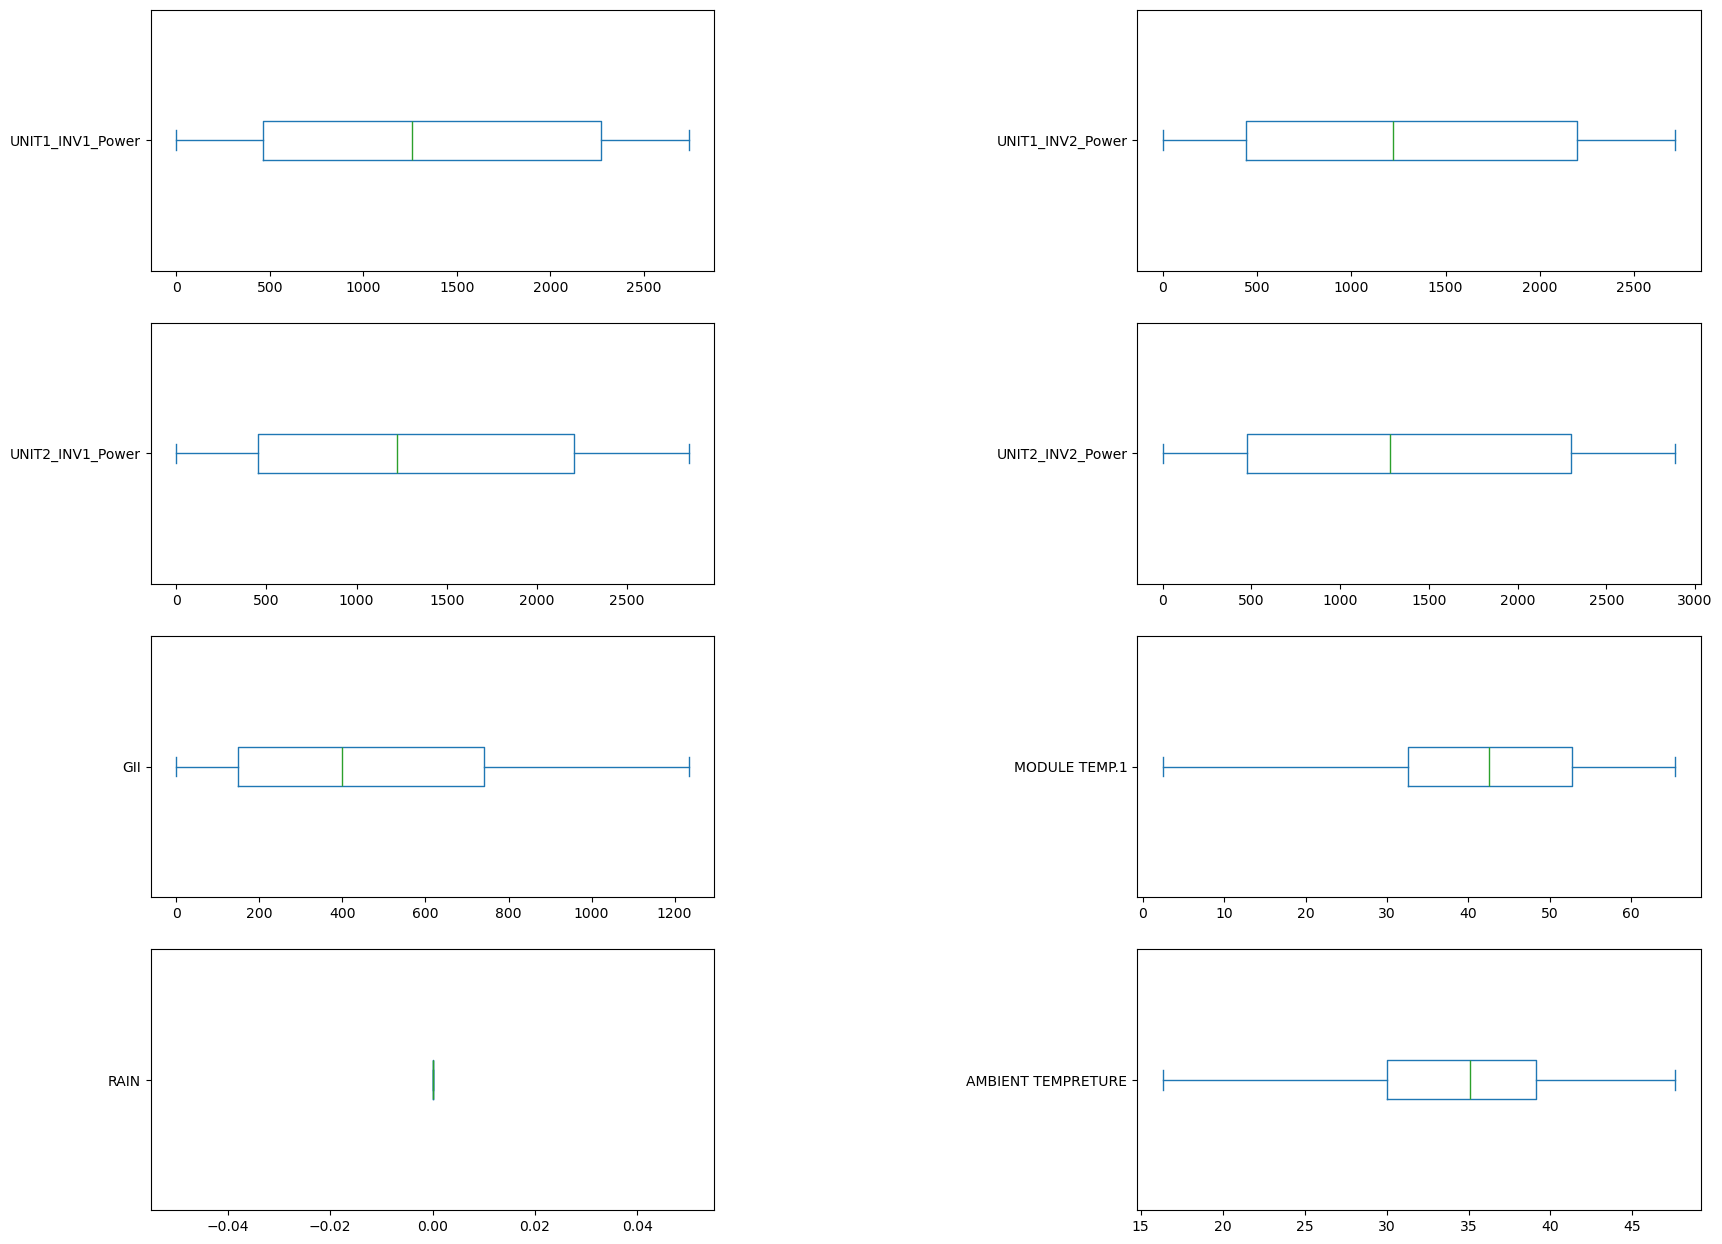

In [29]:
df.plot(kind="box", sharey=False, sharex=False, subplots=True, figsize=(20,40), layout=[10,2],vert=False)
plt.subplots_adjust(wspace=0.75)

# Normalization

In [31]:
 from sklearn.preprocessing import MinMaxScaler

 scaler = MinMaxScaler()

 columns_to_scale = [
     'UNIT1_INV1_Power', 'UNIT1_INV2_Power', 'UNIT2_INV1_Power', 
     'UNIT2_INV2_Power', 'GII', 'MODULE TEMP.1', 
     'RAIN', 'AMBIENT TEMPRETURE'
 ]

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print(df)

              DATE & TIME  UNIT1_INV1_Power  UNIT1_INV2_Power  \
0     2024-04-01 06:18:00          0.027155          0.026901   
1     2024-04-01 06:19:00          0.030477          0.030029   
2     2024-04-01 06:20:00          0.032265          0.031832   
3     2024-04-01 06:21:00          0.034127          0.033635   
4     2024-04-01 06:22:00          0.035952          0.035475   
...                   ...               ...               ...   
68446 2024-06-30 18:06:00          0.000000          0.000000   
68447 2024-06-30 18:07:00          0.000000          0.000000   
68448 2024-06-30 18:08:00          0.000000          0.000000   
68449 2024-06-30 18:09:00          0.000000          0.000000   
68450 2024-06-30 18:10:00          0.000000          0.000000   

       UNIT2_INV1_Power  UNIT2_INV2_Power       GII  MODULE TEMP.1  RAIN  \
0              0.029308          0.029512  0.020259       0.262907   0.0   
1              0.030821          0.031209  0.021880       0.262907 

In [32]:
df.head()

,DATE & TIME,UNIT1_INV1_Power,UNIT1_INV2_Power,UNIT2_INV1_Power,UNIT2_INV2_Power,GII,MODULE TEMP.1,RAIN,AMBIENT TEMPRETURE
0,2024-04-01 06:18:00,0.027155,0.026901,0.029308,0.029512,0.020259,0.262907,0.0,0.2032
1,2024-04-01 06:19:00,0.030477,0.030029,0.030821,0.031209,0.021880,0.262907,0.0,0.2032
2,2024-04-01 06:20:00,0.032265,0.031832,0.032440,0.032906,0.023501,0.262907,0.0,0.2032
3,2024-04-01 06:21:00,0.034127,0.033635,0.034128,0.034673,0.025122,0.264496,0.0,0.2032
4,2024-04-01 06:22:00,0.035952,0.035475,0.035853,0.036370,0.026742,0.264496,0.0,0.2000


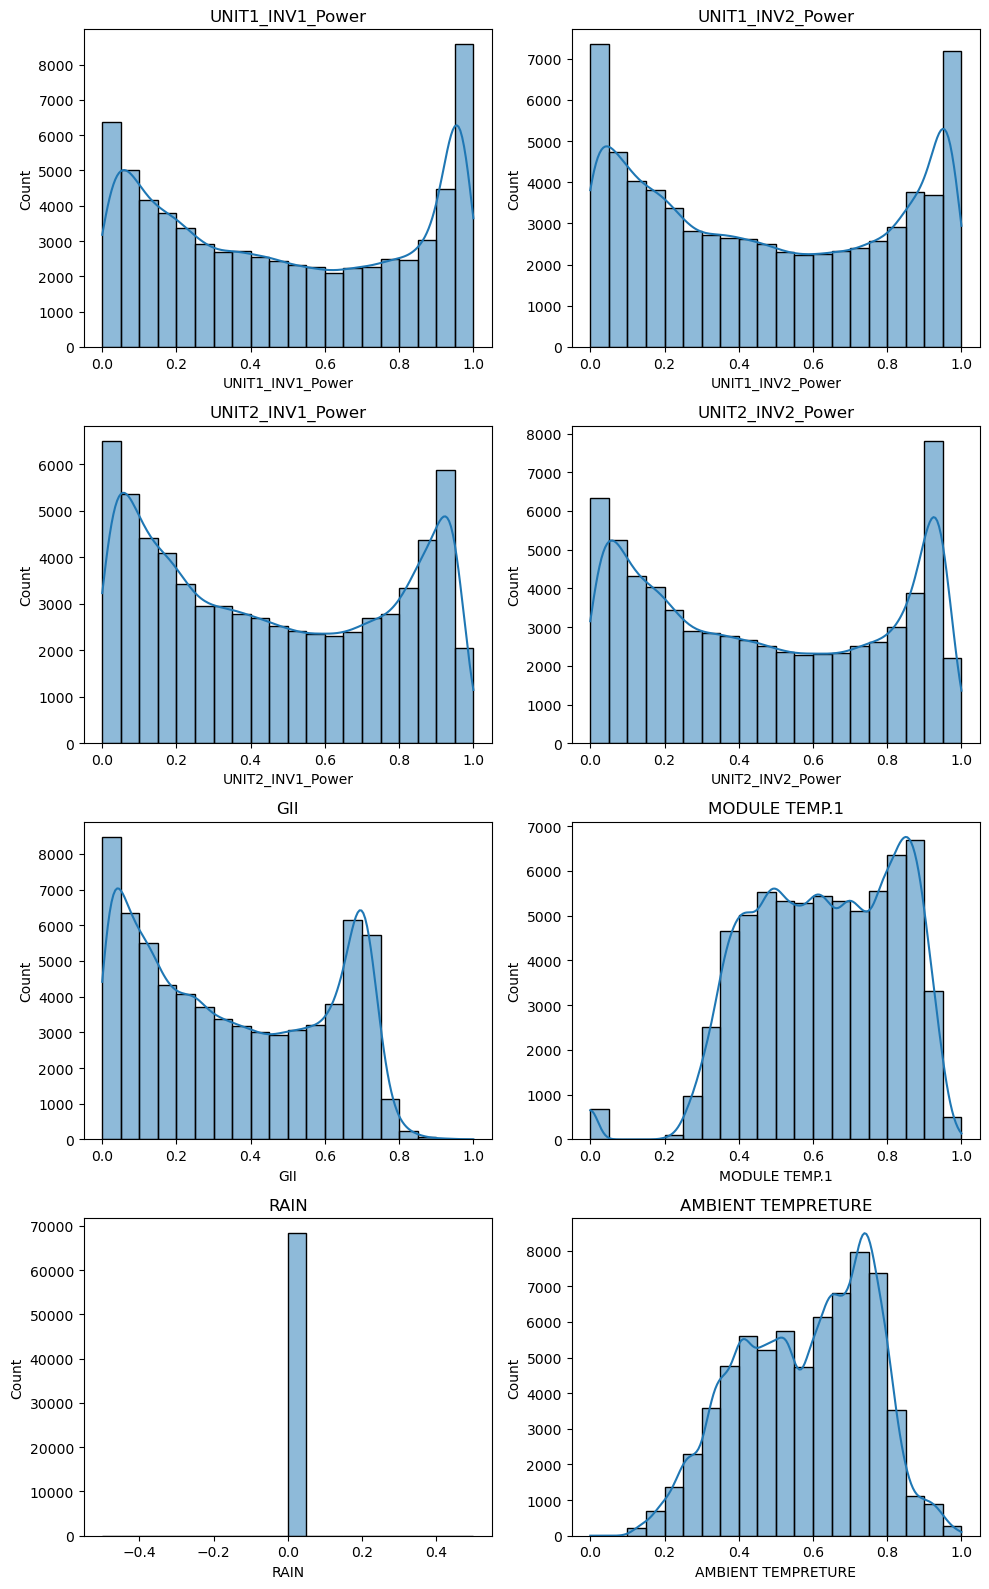

In [90]:
# List of columns you want to plot
columns = ['UNIT1_INV1_Power', 'UNIT1_INV2_Power', 'UNIT2_INV1_Power', 'UNIT2_INV2_Power', 'GII', 'MODULE TEMP.1', 'RAIN', 'AMBIENT TEMPRETURE']

# Set up the figure size
plt.figure(figsize=(10, 16))

# Loop through each column to plot both histogram and KDE
for i, col in enumerate(columns):
    plt.subplot(4, 2, i+1)  # Adjust subplot grid based on the number of columns
    sns.histplot(df[col], bins=20, kde=True)  # kde=True adds the Kernel Density Estimate
    plt.title(col)

# Adjust layout
plt.tight_layout()
plt.show()

In [94]:
df.columns

Index(['DATE & TIME', 'UNIT1_INV1_Power', 'UNIT1_INV2_Power',
       'UNIT2_INV1_Power', 'UNIT2_INV2_Power', 'GII', 'MODULE TEMP.1', 'RAIN',
       'AMBIENT TEMPRETURE', 'BoxCox'],
      dtype='object')

# First Moment Business Decision / Measures of Central Tendency

UNIT1_INV1_Power

In [98]:
mean = df['UNIT1_INV1_Power'].mean()
print('mean: ',mean)

mean:  0.48992107065153906


In [100]:
median = df['UNIT1_INV1_Power'].median()
print('median: ',median)

median:  0.4595955648148834


In [102]:
mode = df['UNIT1_INV1_Power'].mode()
print('mode: ',mode)

mode:  0    0.0
Name: UNIT1_INV1_Power, dtype: float64


UNIT1_INV2_Power

In [106]:
mean = df['UNIT1_INV2_Power'].mean()
print('mean: ',mean)

mean:  0.47790838236748345


In [108]:
median = df['UNIT1_INV2_Power'].median()
print('median: ',median)

median:  0.44995215834816793


In [110]:
mode = df['UNIT1_INV2_Power'].mode()
print('mode: ',mode)

mode:  0    0.0
Name: UNIT1_INV2_Power, dtype: float64


UNIT2_INV1_Power

In [114]:
mean = df['UNIT2_INV1_Power'].mean()
print('mean: ',mean)

mean:  0.46236123353602115


In [116]:
median = df['UNIT2_INV1_Power'].median()
print('median: ',median)

median:  0.4310393347128729


In [118]:
mode = df['UNIT2_INV1_Power'].mode()
print('mode: ',mode)

mode:  0    0.0
Name: UNIT2_INV1_Power, dtype: float64


UNIT2_INV2_Power

In [122]:
mean = df['UNIT2_INV2_Power'].mean()
print('mean: ',mean)

mean:  0.47258426964647726


In [124]:
median = df['UNIT2_INV2_Power'].median()
print('median: ',median)

median:  0.4432975576723242


In [126]:
mode = df['UNIT2_INV2_Power'].mode()
print('mode: ',mode)

mode:  0    0.0
Name: UNIT2_INV2_Power, dtype: float64


GII

In [130]:
mean = df['GII'].mean()
print('mean: ',mean)

mean:  0.3549257707933243


In [132]:
median = df['GII'].median()
print('median: ',median)

median:  0.3241491085899514


In [134]:
mode = df['GII'].mode()
print('mode: ',mode)

mode:  0    0.001621
Name: GII, dtype: float64


MODULE TEMP.1

In [138]:
mean = df['MODULE TEMP.1'].mean()
print('mean: ',mean)

mean:  0.6306001909717415


In [140]:
median = df['MODULE TEMP.1'].median()
print('median: ',median)

median:  0.6362192389537167


In [142]:
mode = df['MODULE TEMP.1'].mode()
print('mode: ',mode)

mode:  0    0.0
Name: MODULE TEMP.1, dtype: float64


RAIN

In [146]:
mean = df['RAIN'].mean()
print('mean: ',mean)

mean:  0.0


In [148]:
median = df['RAIN'].median()
print('median: ',median)

median:  0.0


In [150]:
mode = df['RAIN'].mode()
print('mode: ',mode)

mode:  0    0.0
Name: RAIN, dtype: float64


AMBIENT TEMPRETURE

In [154]:
mean = df['AMBIENT TEMPRETURE'].mean()
print('mean: ',mean)

mean:  0.5788282912935516


In [156]:
median = df['AMBIENT TEMPRETURE'].median()
print('median: ',median)

median:  0.5999999359999898


In [158]:
mode = df['AMBIENT TEMPRETURE'].mode()
print('mode: ',mode)

mode:  0    0.7248
Name: AMBIENT TEMPRETURE, dtype: float64


# Second Moment Business Decision / Measures of Dispersion¶

UNIT1_INV1_Power

In [167]:
variance = df['UNIT1_INV1_Power'].var()
print(variance)

0.11305546901052581


In [169]:
Standard_Deviation = df['UNIT1_INV1_Power'].std()
print(Standard_Deviation )

0.3362372213341732


In [173]:
Range = df['UNIT1_INV1_Power'].max() - df['UNIT1_INV1_Power'].min()
print("Range of UNIT1_INV1_Power:", Range)

Range of UNIT1_INV1_Power: 1.0


UNIT1_INV2_Power

In [177]:
variance = df['UNIT1_INV2_Power'].var()
print(variance)

0.11110157378855684


In [179]:
Standard_Deviation = df['UNIT1_INV2_Power'].std()
print(Standard_Deviation )

0.333319027042497


In [181]:
Range = df['UNIT1_INV2_Power'].max() - df['UNIT1_INV2_Power'].min()
print("Range of UNIT1_INV2_Power:", Range)

Range of UNIT1_INV2_Power: 1.0


UNIT2_INV1_Power

In [185]:
variance = df['UNIT2_INV1_Power'].var()
print(variance)

0.10169058212722075


In [187]:
Standard_Deviation = df['UNIT2_INV1_Power'].std()
print(Standard_Deviation )

0.3188896080577427


In [189]:
Range = df['UNIT2_INV1_Power'].max() - df['UNIT2_INV1_Power'].min()
print("Range of UNIT2_INV1_Power:", Range)

Range of UNIT2_INV1_Power: 1.0


UNIT2_INV2_Power

In [193]:
variance = df['UNIT2_INV2_Power'].var()
print(variance)

0.10476762096808523


In [195]:
Standard_Deviation = df['UNIT2_INV2_Power'].std()
print(Standard_Deviation )

0.3236782676796285


In [197]:
Range = df['UNIT2_INV2_Power'].max() - df['UNIT2_INV2_Power'].min()
print("Range of UNIT2_INV2_Power:", Range)

Range of UNIT2_INV2_Power: 1.0


GII

In [201]:
variance = df['GII'].var()
print(variance)

0.061971123965131054


In [203]:
Standard_Deviation = df['GII'].std()
print(Standard_Deviation )

0.2489400007333716


In [205]:
Range = df['GII'].max() - df['GII'].min()
print("Range of GII:", Range)

Range of GII: 1.0


MODULE TEMP.1

In [209]:
variance = df['MODULE TEMP.1'].var()
print(variance)

0.036923867717709245


In [211]:
Standard_Deviation = df['MODULE TEMP.1'].std()
print(Standard_Deviation )

0.19215584226796031


In [213]:
Range = df['MODULE TEMP.1'].max() - df['MODULE TEMP.1'].min()
print("Range of MODULE TEMP.1:", Range)

Range of MODULE TEMP.1: 0.9999999999999999


RAIN

In [217]:
variance = df['RAIN'].var()
print(variance)

0.0


In [219]:
Standard_Deviation = df['RAIN'].std()
print(Standard_Deviation )

0.0


In [221]:
Range = df['RAIN'].max() - df['RAIN'].min()
print("Range of RAIN:", Range)

Range of RAIN: 0.0


AMBIENT TEMPRETURE

In [225]:
variance = df['AMBIENT TEMPRETURE'].var()
print(variance)

0.03156567457834842


In [227]:
Standard_Deviation = df['AMBIENT TEMPRETURE'].std()
print(Standard_Deviation )

0.17766731432187638


In [229]:
Range = df['AMBIENT TEMPRETURE'].max() - df['AMBIENT TEMPRETURE'].min()
print("Range of AMBIENT TEMPRETURE:", Range)

Range of AMBIENT TEMPRETURE: 0.9999999999999999


# Third Moment Business Decision / Skewness¶

UNIT1_INV1_Power

In [234]:
skewness = df['UNIT1_INV1_Power'].skew()
print(skewness)

0.09405715856579852


UNIT1_INV2_Power

In [238]:
skewness = df['UNIT1_INV2_Power'].skew()
print(skewness)

0.10013201598960185


UNIT2_INV1_Power

In [242]:
skewness = df['UNIT2_INV1_Power'].skew()
print(skewness)

0.13249025853164115


UNIT2_INV2_Power

In [246]:
skewness = df['UNIT2_INV2_Power'].skew()
print(skewness)

0.10787639634254544


GII

In [250]:
skewness = df['GII'].skew()
print(skewness)

0.17092940396769754


MODULE TEMP.1

In [254]:
skewness = df['MODULE TEMP.1'].skew()
print(skewness)

-0.3517013156300247


RAIN


In [258]:
skewness = df['RAIN'].skew()
print(skewness)

0.0


AMBIENT TEMPRETURE

In [262]:
skewness = df['AMBIENT TEMPRETURE'].skew()
print(skewness)

-0.24549135370741038


# Fourth Moment Business Decision / Kurtosis

UNIT1_INV1_Power

In [267]:
kurtosis = df['UNIT1_INV1_Power'].kurtosis()
print(kurtosis)

-1.461699237072652


UNIT1_INV2_Power

In [271]:
kurtosis = df['UNIT1_INV2_Power'].kurtosis()
print(kurtosis)

-1.4386420489301985


UNIT2_INV1_Power

In [275]:
kurtosis = df['UNIT2_INV1_Power'].kurtosis()
print(kurtosis)

-1.4249598849824747


UNIT2_INV2_Power

In [279]:
kurtosis = df['UNIT2_INV2_Power'].kurtosis()
print(kurtosis)

-1.4488942869700532


GII

In [283]:
kurtosis = df['GII'].kurtosis()
print(kurtosis)

-1.396272557048408


MODULE TEMP.1

In [287]:
kurtosis = df['MODULE TEMP.1'].kurtosis()
print(kurtosis)

-0.35440267336617604


RAIN

In [291]:
kurtosis = df['RAIN'].kurtosis()
print(kurtosis)

0.0


AMBIENT TEMPRETURE

In [295]:
kurtosis = df['AMBIENT TEMPRETURE'].kurtosis()
print(kurtosis)

-0.8060400666721415
